In [99]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t_data = pd.read_csv("Tweets.csv")

In [3]:
#first five rows of data
t_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
# first five text
text = t_data['text']
text[0:5]

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [204]:
# total number of negative ,neutral and positive mood
airline_sentiment  = t_data['airline_sentiment'].value_counts()
print airline_sentiment 

negative    9178
neutral     3099
positive    2363
dtype: int64


([<matplotlib.axis.XTick at 0x7f933299c9d0>,
 <a list of 3 Text xticklabel objects>)

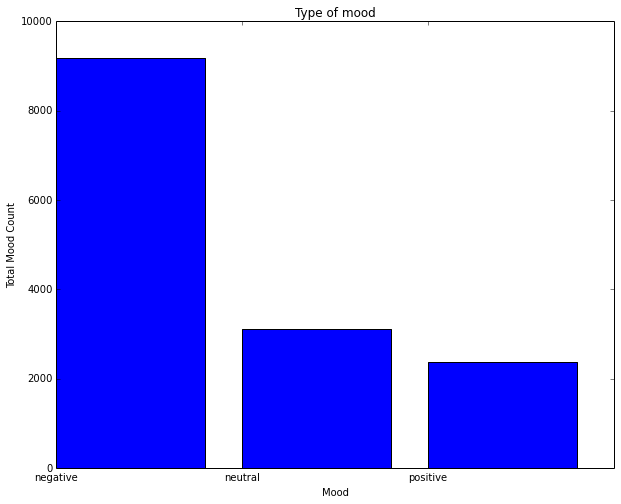

In [205]:
####### let's plot Type of mood and how much
plt.figure(figsize=(10,8))
plt.bar([1,2,3],airline_sentiment)
plt.title("Type of mood ")
plt.xlabel("Mood")
plt.ylabel("Total Mood Count")
plt.xticks([1,2,3],['negative','neutral','positive'])

We can clearly say that negative is alost 3 time higher than positive mood which is not good for any airline

In [206]:
# type of airline
airline = t_data['airline'].value_counts()
print airline

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
dtype: int64


In [207]:
# let's plot of type of airline vs number of airline 

([<matplotlib.axis.XTick at 0x7f9333765650>,
 <a list of 6 Text xticklabel objects>)

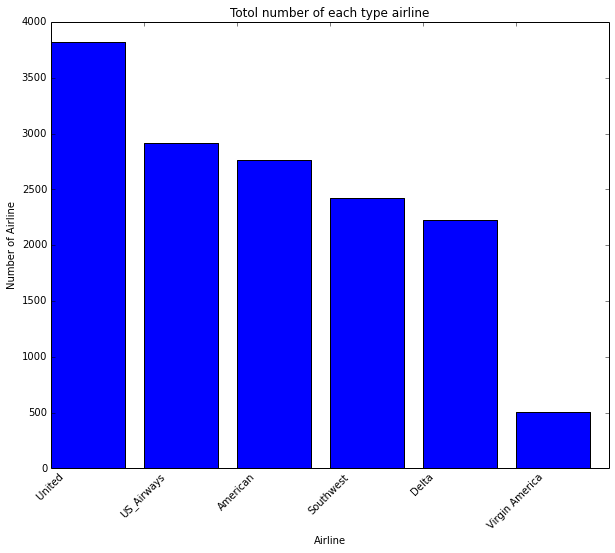

In [102]:
plt.figure(figsize=(10,8))
plt.bar([1,2,3,4,5,6],airline)
plt.xlabel("Airline")
plt.ylabel("Number of Airline")
plt.title("Totol number of each type airline")
plt.xticks([1,2,3,4,5,6],['United ','US_Airways','American','Southwest','Delta','Virgin America'],rotation=45)

In [52]:

negative_reason = t_data['negativereason'].dropna()

In [92]:
List = negative_reason.value_counts().index.tolist()
print List
print negative_reason.value_counts()

['Customer Service Issue', 'Late Flight', "Can't Tell", 'Cancelled Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines', 'Damaged Luggage']
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
dtype: int64


here you can see reason of negative mood are Cancelled Flight, Bad Flight,Late Flight,Customer Service Issue,Flight Booking Problems

# Negative reason for all type of flights

In [209]:
# now lets see all reason for all flight

In [61]:
Index = range(1,(len(negative_reason.unique())+1))
print Index

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


([<matplotlib.axis.XTick at 0x7f93334201d0>,
 <a list of 10 Text xticklabel objects>)

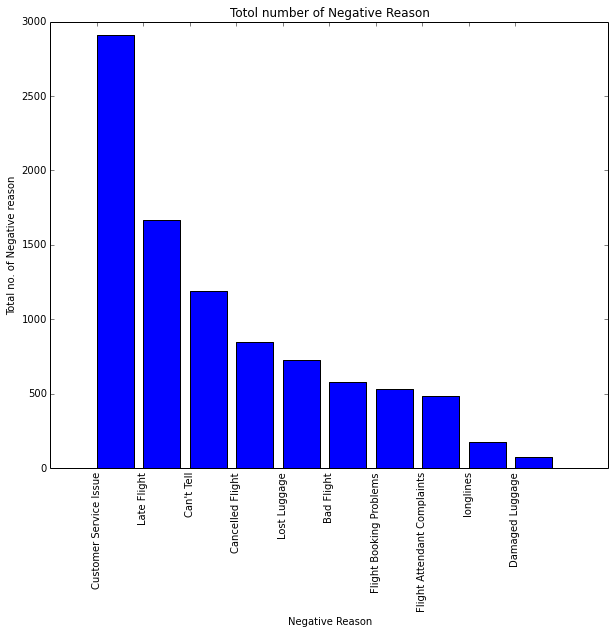

In [103]:
plt.figure(figsize=(10,8))
plt.bar(Index,negative_reason.value_counts())
plt.xlabel("Negative Reason")
plt.ylabel("Total Number for Negative Reason")
plt.title("Totol number of Negative Reason")
plt.xticks(Index,List,rotation = 90)

Biggest negative reason are: costomer services are not good , flights are not on time, flights gettig cancelled, laggage lost etc.

# For each flight plot negative reason

In [163]:
def reason_each_flight(airline):
    data = t_data[t_data['airline'] == airline]
    data = data['negativereason']
    data_count = data.value_counts()
    List = data.value_counts().index.tolist()
    Index = range(1,(len(data.unique())))
    plt.bar(Index, data_count)
    plt.xlabel('Negative Reason')
    plt.ylabel('Total Number for Negative Reason')
    plt.title('Total number for every negative reason for ' + airline)
    plt.xticks(Index, List,rotation = 90)

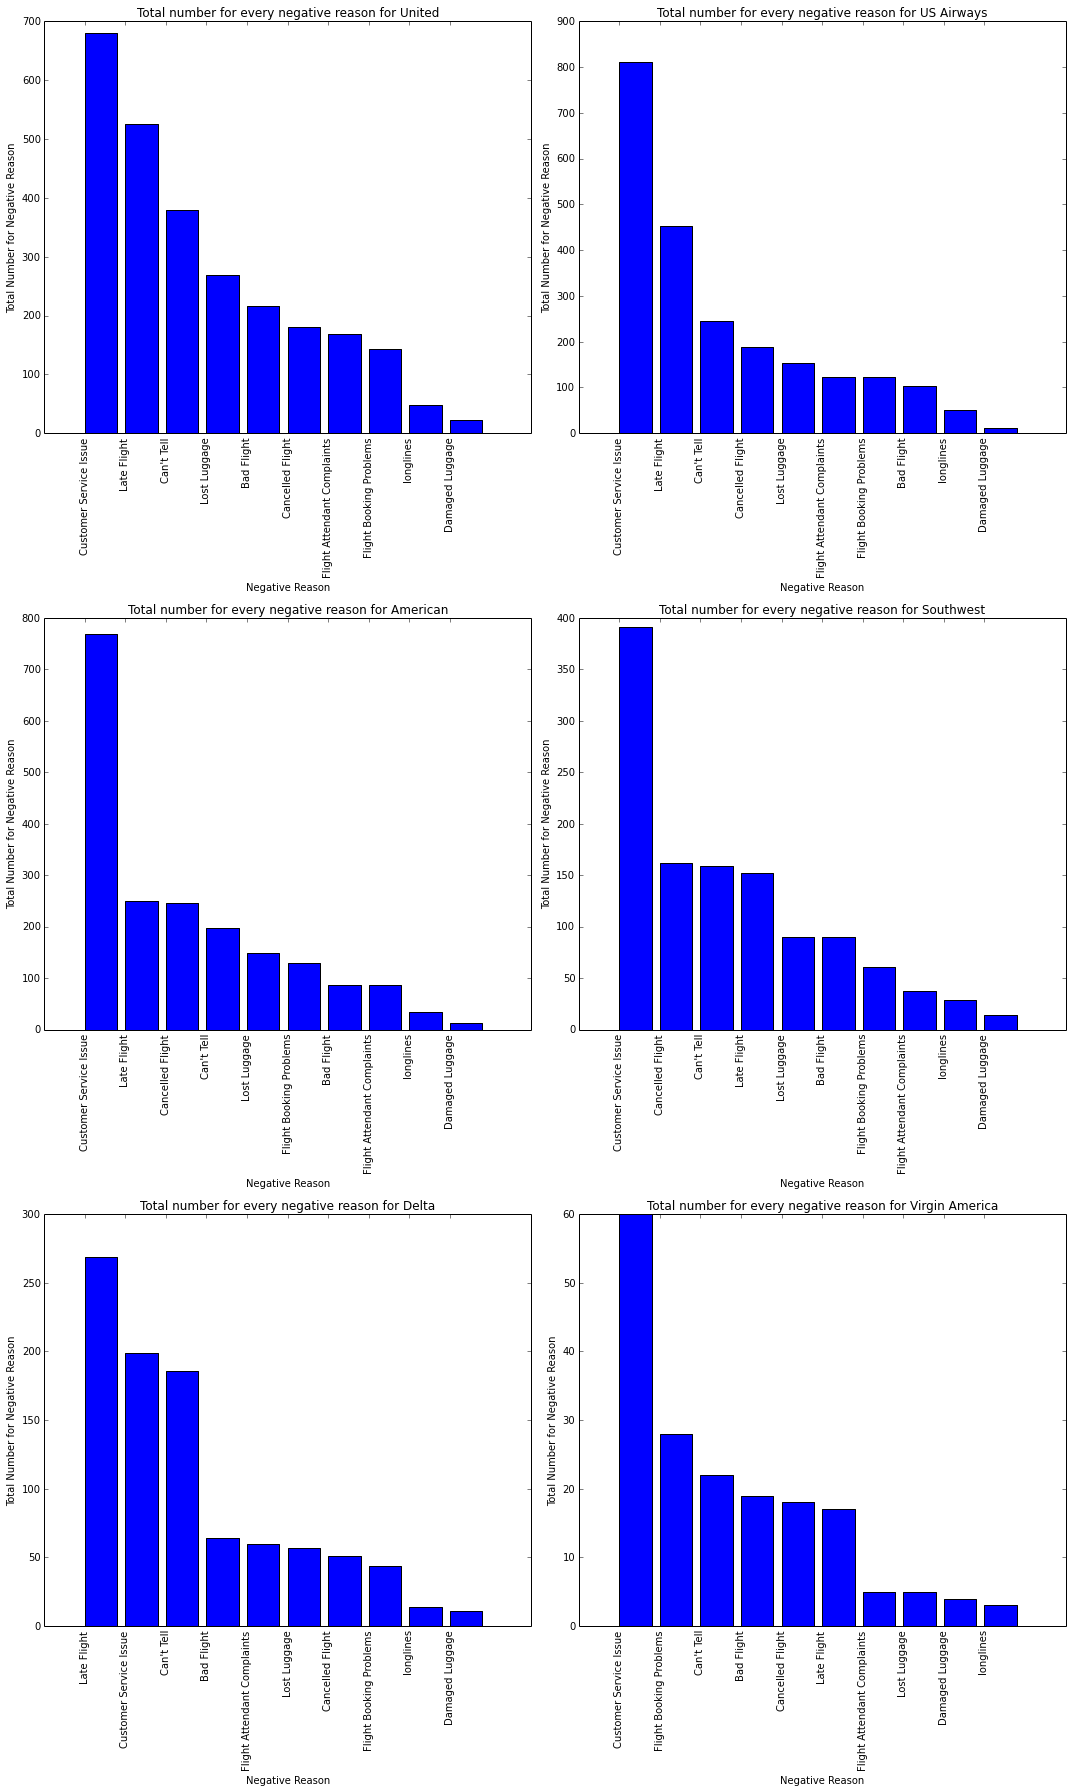

In [180]:
Air = t_data['airline'].value_counts().index.tolist()
plt.figure(1,figsize=(15, 25))
plt.subplot(321)
reason_each_flight(Air[0])
plt.subplot(322)
reason_each_flight(Air[1])
plt.subplot(323)
reason_each_flight(Air[2])
plt.subplot(324)
reason_each_flight(Air[3])
plt.subplot(325)
reason_each_flight(Air[4])
plt.subplot(326)
reason_each_flight(Air[5])
plt.tight_layout()

# Word - Cloud for negative, neutral, positive

In [203]:
#let's make Word Cloud for negative, neutral, positive mood

In [188]:
#import wordcloud and stopwords
from wordcloud import WordCloud,STOPWORDS

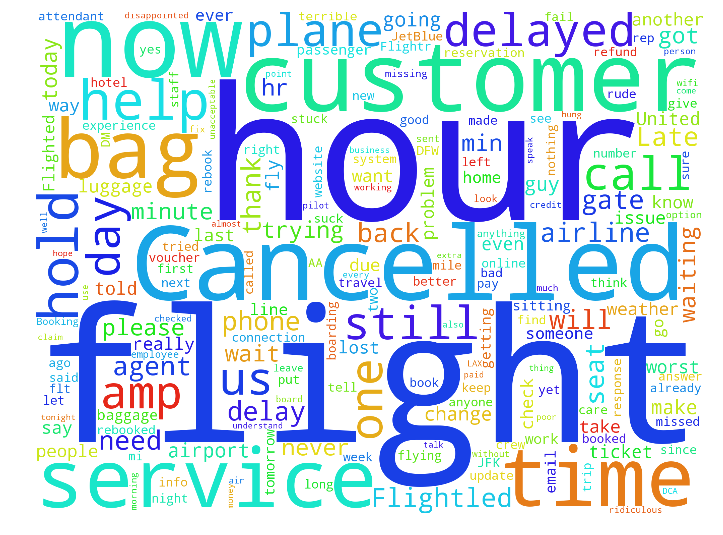

In [200]:
df=t_data[t_data['airline_sentiment']=='negative'] 
# join tweets to a single string
words = ' '.join(df['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


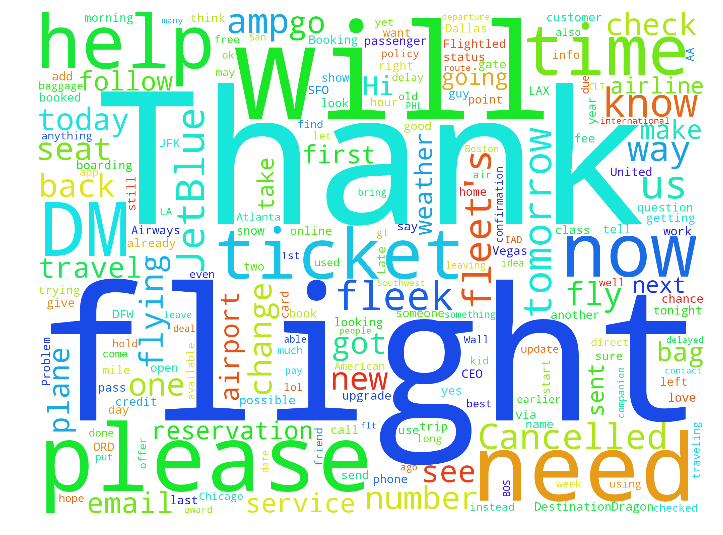

In [201]:
df=t_data[t_data['airline_sentiment']=='neutral'] 
# join tweets to a single string
words = ' '.join(df['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

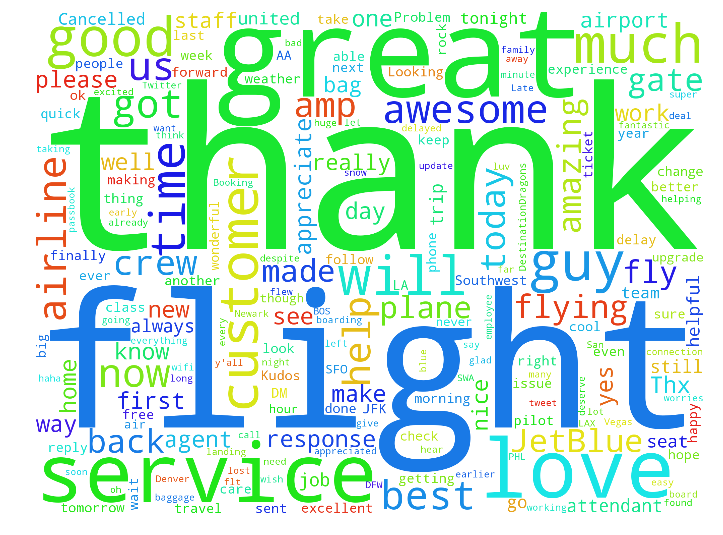

In [202]:
df=t_data[t_data['airline_sentiment']=='positive'] 
# join tweets to a single string
words = ' '.join(df['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()